# Spotify Song Data - Binary Classification

This is a binary classification project that uses a dataset of Spotify song data to determine what features make a song popular on the platform, aka a hit song.

## Introduction

Over the last decade, Spotify has completely changed the face of the music industry.  Streaming has become king and is the main way that music fans listen to their favorite artists.  Spotify is the undeniable leader in this market and if your song is doing well on Spotify, you're song is a success.  With millions of songs avaialble for streaming at any given moment, it's extremely hard for a new artist to cut through all the noise and find success for their songs.  Perhaps, using machine learning, we can decode the elusive "Spotify algorithm" a bit and see if we can ascertain what actually makes a hit song. 

The good folks at Spotify have generously offered their datasets to the public through their Spotify for Developers program.  This is an excellent resource to see what's going on under the hood when it comes to your favorite songs.  Spotify has established their own metrics to classify songs for curated playlists, user recommendations, and several other applications.  The abundance of data has lead to sevearl interesting questions: 
- Would we also be able to use these metrics to predict the popularity of a song?
- If so, would we be able to see which metrics are the most important in determining whether a song is a hit?

### Imports

In [1]:
# Regulars
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve


Bad key "text.kerning_factor" on line 4 in
/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Functions

#### Plotting Functions

##### Scikit-Learn Evaluations

In [3]:
def evaluate_model(model, X_test, y_test):
    '''Evaluates a scikit-learn classification model and displays a classification report, 
    a confusion matrix, and a ROC-AUC plot.
    
    -----------
    Parameters
    -----------
    model - the model you want to evaluate
    
    X_test - Dataset used in testing the model 
    
    y_test - Label used for predictions and evaluation the model'''
    
    # Predictions
    y_hat_test = model.predict(X_test)
    
    # Classification Report
    print('--------- Classification Report ----------\n')
    print(classification_report(y_test, y_hat_test))
    
    # Confusion Matrix
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)
    plot_confusion_matrix(model, X_test, y_test, normalize = 'true',
                          cmap = 'Blues', ax = axes[0])
    
    # ROC-AUC Curve
    roc_auc_plot = plot_roc_curve(model, X_test, y_test, ax = axes[1])
    axes[1].legend()
    axes[1].plot([0,1], [0,1], ls = ':')
    axes[1].grid()
    axes[1].set_title('ROC-AUC Plot')
    fig.tight_layout()
    plt.show()

##### Tensorflow Evaluations

In [4]:
def network_eval_plots(results):
    history = results.history
    
    # Loss
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def nn_confusion_matrix(y_test, preds):
    labels = ['Hit', 'Dud']
    cm = confusion_matrix(y_test, preds, normalize = 'true')
    ax = plt.figure(figsize = (6, 6))
    ax = sns.heatmap(cm, cmap = 'Blues', annot = True, 
                     xticklabels = labels, yticklabels = labels)
    ax.set_ylim([0,2])
    
    
def evaluate_network(results, model, X_test, y_test):
    preds = model.predict(X_test).round()
    print('                 Model Evaluation')
    print('-------------------------------------------------------')
    print(model.evaluate(X_test, y_test))
    print(' ')
    print('                 Loss & Accuracy Curves')
    print('-------------------------------------------------------')
    network_eval_plots(results)
    print(' ')
    print('                 Classification Report')
    print('-------------------------------------------------------')
    print(classification_report(y_test, preds))
    print(' ')    
    print('                 Confusion Matrix')
    print('-------------------------------------------------------')
    nn_confusion_matrix(y_test, preds)    

## Obtain

### Import Clean DataFrame

In the 'data_cleaning.ipynb' notebook, we cleaned the original dataframe and saved it to it's own csv.  Here, we'll just import it and make sure everything looks okay prior to processing the data for modeling.

In [5]:
df = pd.read_csv('clean_spotify_data.csv').set_index('name')
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,month
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0,0.0936,149.976,0.6340,1920s,1
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0,0.0534,86.889,0.9500,1920s,1
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0,0.1740,97.600,0.6890,1920s,1
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0,0.0425,127.997,0.0422,1920s,1
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0,0.0768,122.076,0.2990,1920s,10


## Data Processing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Set X and Y
X = df.drop('popularity', axis = 1)
y = df['popularity']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# See what we have
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_train.shape)

Shape of X_train: (139511, 15)
Shape of X_test: (34878, 15)
Shape of y_train (139511,)
Shape of y_test (139511,)


In [8]:
# Separate into num_cols and cat_cols
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [10]:
# Create Pipelines for column transformer

num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])

cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown = 'ignore', 
                                                              sparse = False))])

# Create preprocessing pipeline with column transformer
preprocessing = ColumnTransformer(transformers = [('num', num_transformer, num_cols),
                                                  ('cat', cat_transformer, cat_cols)])

X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [11]:
# Get components together to make a dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)

# Put data back into a clean dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = [*num_cols, *cat_features])
X_test_df = pd.DataFrame(X_test_processed, columns = [*num_cols, *cat_features])

#### Final Clean Dataframe

In [12]:
X_train_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,0.005462,0.821682,0.081697,0.763,1.0,0.877000,0.545455,0.1100,0.791199,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000005,0.557244,0.046424,0.765,0.0,0.873000,0.636364,0.1320,0.803633,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.552209,0.475177,0.040416,0.505,0.0,0.000263,0.000000,0.0535,0.743716,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.974900,0.255319,0.039424,0.218,0.0,0.241000,0.181818,0.2940,0.756965,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.810241,0.737589,0.031446,0.450,0.0,0.000005,0.818182,0.2720,0.857834,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_test_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,0.816265,0.585613,0.044237,0.351,0.0,0.000000,1.000000,0.123,0.744938,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001295,0.395137,0.015794,0.914,0.0,0.000000,0.363636,0.889,0.829175,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.985944,0.389058,0.045294,0.442,0.0,0.012900,0.181818,0.346,0.749558,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.980924,0.737589,0.032787,0.189,0.0,0.000009,0.272727,0.523,0.735573,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.831325,0.196555,0.086430,0.351,0.0,0.911000,0.000000,0.112,0.699444,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling

The modeling phase was an extremely iterative process where we experimented with several different algorithms to try to find the best fit for the data in order to provide the best results when looking at important features.

### Class Imbalances

 Since the target classes are highly imbalanced, we're going to use an oversampling method to get a balanced sample.

In [14]:
y_train.value_counts()

0    133094
1      6417
Name: popularity, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [16]:
# Set the oversampler
smote = RandomOverSampler(random_state = 30)

# Create the sampled X_train, y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_df, y_train)

In [17]:
X_train_resampled.shape

(266188, 25)

In [18]:
y_train_resampled.value_counts()

1    133094
0    133094
Name: popularity, dtype: int64

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

#### Base Model

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.81      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.81      0.59     34878
weighted avg       0.95      0.82      0.87     34878



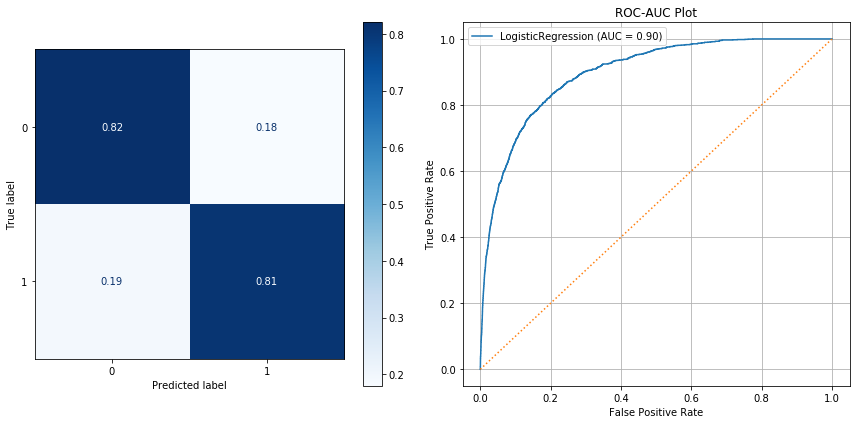

In [21]:
# Set model 
log = LogisticRegression(random_state = 30)

# Fit model
log.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(log, X_test_df, y_test)

#### LogisticRegressionCV

Trying this out.  Essentially Logistic Regression with built in cross validation.

In [22]:
from sklearn.linear_model import LogisticRegressionCV

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.81      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.81      0.59     34878
weighted avg       0.95      0.82      0.87     34878



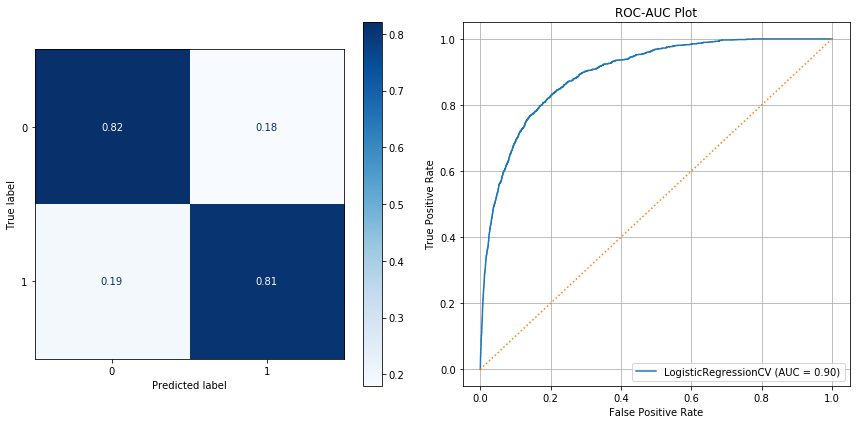

In [24]:
# Set model 
log_cv = LogisticRegressionCV(random_state = 30)

# Fit model
log_cv.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(log_cv, X_test_df, y_test)

#### Logistic Regression with Gridsearch

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Set estimator 
estimator = LogisticRegression(random_state = 30)

# Set params 
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C': [0.1, 1, 10],
          'solver': ['newton-cg','lbfgs', 'libliner', 'sag', 'saga'],
          'max_iter': [50, 100, 250]}

# Create Gridsearch
grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    n_jobs = -1, 
                    verbose = 1, 
                    cv = 3)

# Fit gridsearch
grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 11.1min finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=30), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [50, 100, 250],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'libliner', 'sag',
                                    'saga']},
             verbose=1)

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.81      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.81      0.59     34878
weighted avg       0.95      0.82      0.87     34878



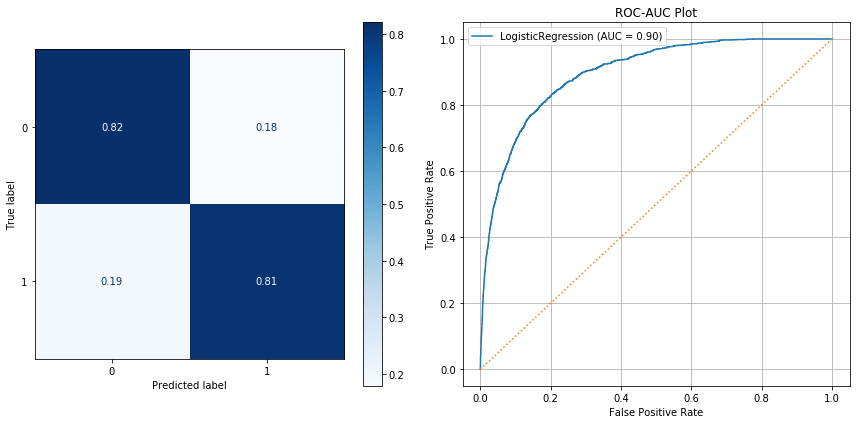

In [28]:
# Fit the model with best parameters
best_log_params = grid.best_params_
best_log_model = LogisticRegression(**best_log_params,
                                    random_state = 30)
best_log_model.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(best_log_model, X_test_df, y_test)

### Naive Bayes

#### GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       1.00      0.38      0.55     33323
           1       0.07      0.99      0.13      1555

    accuracy                           0.40     34878
   macro avg       0.53      0.68      0.34     34878
weighted avg       0.96      0.40      0.53     34878



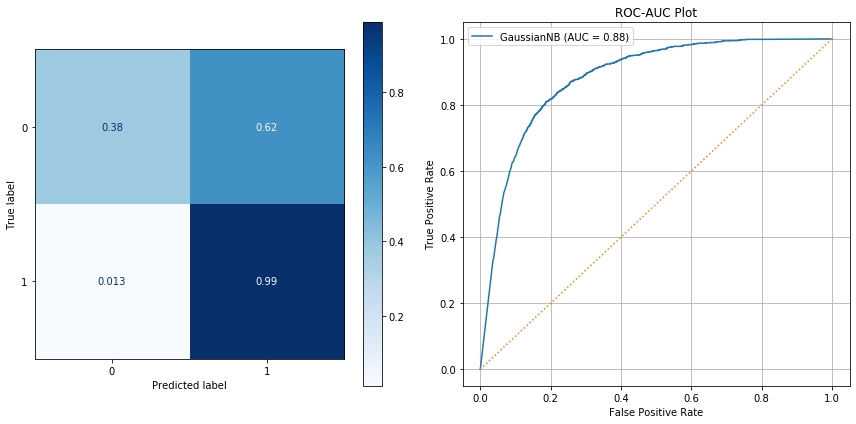

In [30]:
# Set Model
gaussian = GaussianNB()

# Fit model
gaussian.fit(X_train_resampled, y_train_resampled)

# Evaluate
evaluate_model(gaussian, X_test_df, y_test)

#### ComplementNB

In [31]:
from sklearn.naive_bayes import BernoulliNB

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     33323
           1       0.15      0.78      0.25      1555

    accuracy                           0.79     34878
   macro avg       0.57      0.78      0.56     34878
weighted avg       0.95      0.79      0.85     34878



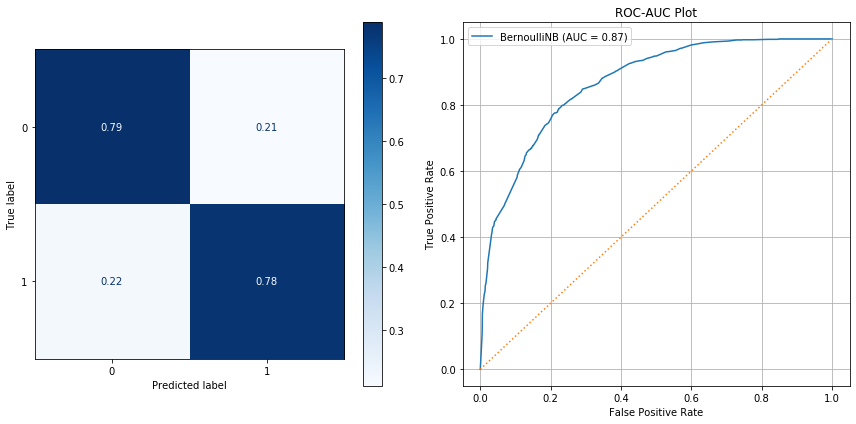

In [32]:
# Set Model
bernoulli = BernoulliNB()

# Fit model
bernoulli.fit(X_train_resampled, y_train_resampled)

# Evaluate
evaluate_model(bernoulli, X_test_df, y_test)

### SGD

In [33]:
from sklearn.linear_model import SGDClassifier

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     33323
           1       0.19      0.77      0.30      1555

    accuracy                           0.84     34878
   macro avg       0.59      0.81      0.61     34878
weighted avg       0.95      0.84      0.88     34878



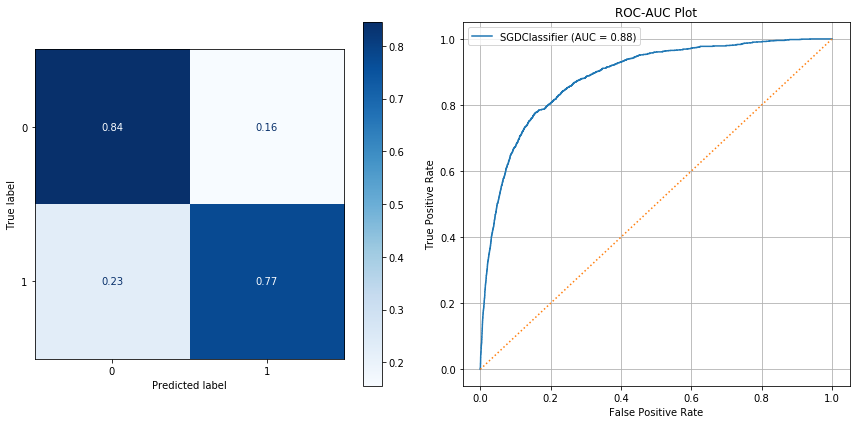

In [35]:
# Set model
sgd = SGDClassifier(random_state = 30)

# Fit model
sgd.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(sgd, X_test_df, y_test)

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33323
           1       0.33      0.32      0.32      1555

    accuracy                           0.94     34878
   macro avg       0.65      0.64      0.65     34878
weighted avg       0.94      0.94      0.94     34878



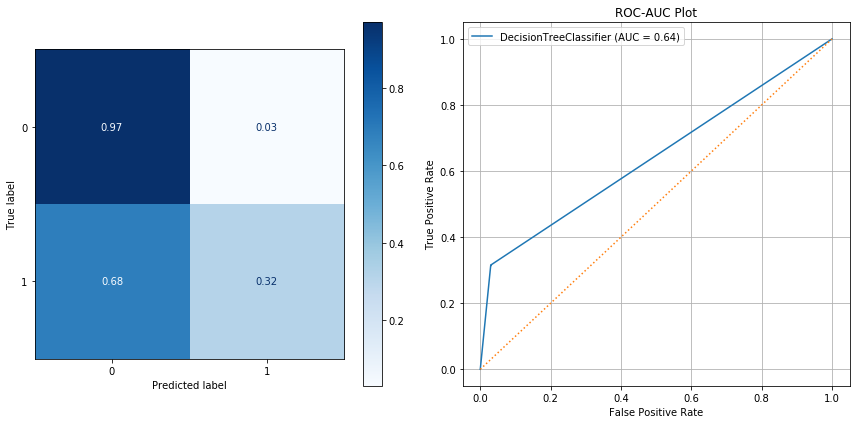

In [37]:
# Set model
tree = DecisionTreeClassifier(random_state = 30)

# Fit model
tree.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(tree, X_test_df, y_test)

#### Gridsearch

In [38]:
estimator = DecisionTreeClassifier(random_state = 30)

params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'max_features': [None, 'auto', 'sqrt', 'log2']}

grid = GridSearchCV(estimator = estimator,
                    param_grid = params, 
                    n_jobs = -1, 
                    verbose = 1,
                    cv = 3)

grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   33.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=30), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33323
           1       0.29      0.30      0.30      1555

    accuracy                           0.94     34878
   macro avg       0.63      0.63      0.63     34878
weighted avg       0.94      0.94      0.94     34878



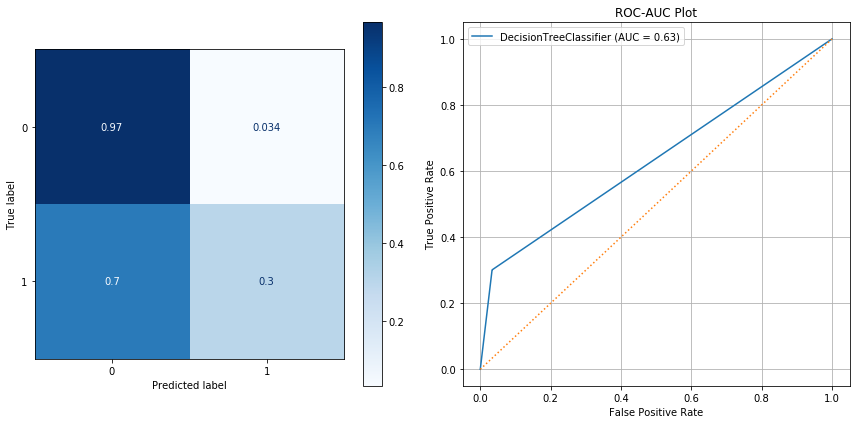

In [39]:
# Fit the model with best parameters
best_tree_params = grid.best_params_
best_tree_model = DecisionTreeClassifier(**best_tree_params,
                                         random_state = 30)
best_tree_model.fit(X_train_df, y_train)

# Evaluate model
evaluate_model(best_tree_model, X_test_df, y_test)

### Support Vector Machines

#### SVC

In [40]:
from sklearn.svm import SVC

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     33323
           1       0.18      0.81      0.30      1555

    accuracy                           0.83     34878
   macro avg       0.59      0.82      0.60     34878
weighted avg       0.95      0.83      0.88     34878



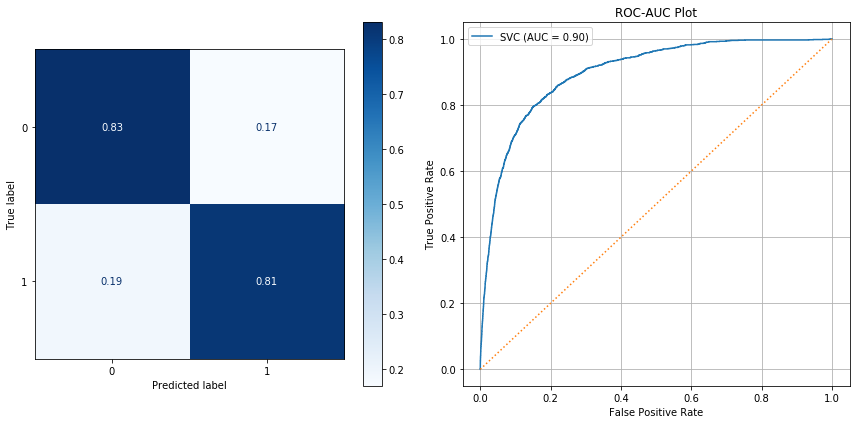

In [41]:
# Set Model
svc = SVC()

# Fit model
svc.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(svc, X_test_df, y_test)

#### SVC with Gridsearch

Took forever - 6+ hours. Will revisit later on.  Code is here in the markdown.

```python
# Set Estimator
estimator = SVC(class_weight = 'balanced')

# Set params
params = {'C': [0.1, 1.0],
          'kernel': ['linear', 'rbf'],
          'gamma': ['scale', 'auto'],
          'decision_function_shape': ['ovo', 'ovr']}

grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    cv = 3, 
                    scoring = 'recall',
                    verbose = 1,
                    n_jobs = -1)

# fit the thing
grid.fit(X_train_df, y_train)```

### AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostClassifier

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.83      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.82      0.59     34878
weighted avg       0.95      0.82      0.87     34878



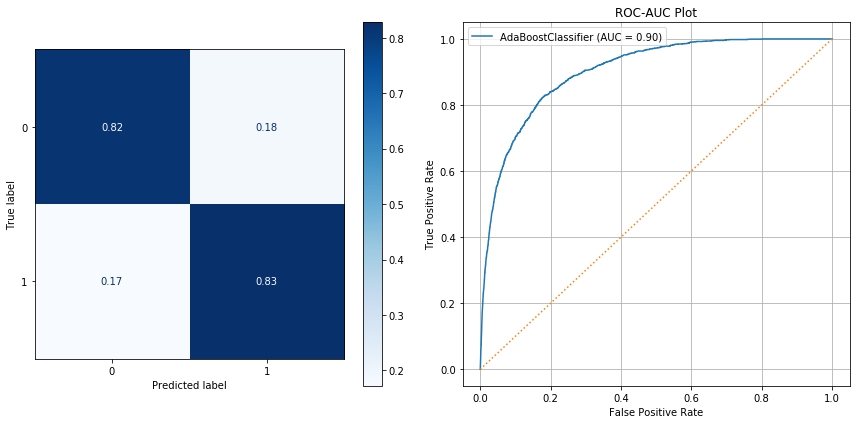

In [43]:
# Set model
ada = AdaBoostClassifier()

# Fit model
ada.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(ada, X_test_df, y_test)

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33323
           1       0.59      0.31      0.41      1555

    accuracy                           0.96     34878
   macro avg       0.78      0.65      0.69     34878
weighted avg       0.95      0.96      0.95     34878



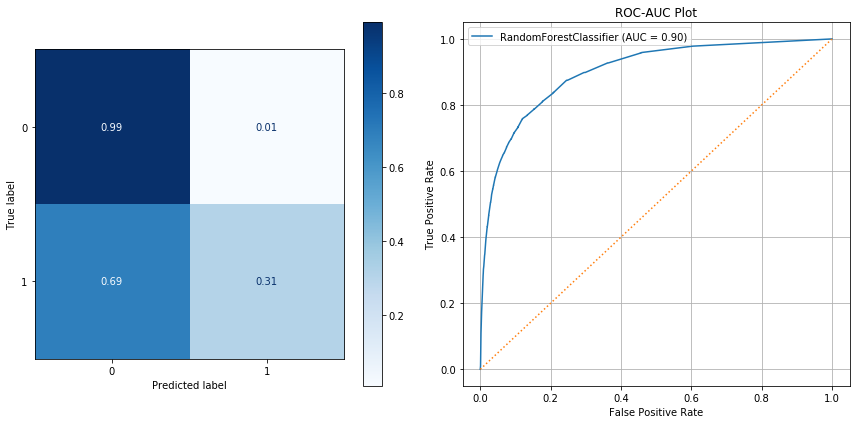

In [45]:
# Set model
rf = RandomForestClassifier(random_state = 30)

# Fit Model
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(rf, X_test_df, y_test)

#### Random Forest with Gridsearch

In [46]:
# Set estimator 
estimator = RandomForestClassifier(random_state = 30)

# Set params 
params = {'n_estimators': [50, 100, 250, 500],
          'criterion': ['gini', 'entropy'],
          'max_features': ['auto','sqrt', 'log2'],
          'max_depth': [None, 10, 100]}

# Create Gridsearch
grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    n_jobs = -1, 
                    verbose = 1, 
                    cv = 3)

# Fit gridsearch
grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 150.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 174.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500]},
             verbose=1)

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33323
           1       0.60      0.30      0.40      1555

    accuracy                           0.96     34878
   macro avg       0.78      0.65      0.69     34878
weighted avg       0.95      0.96      0.95     34878



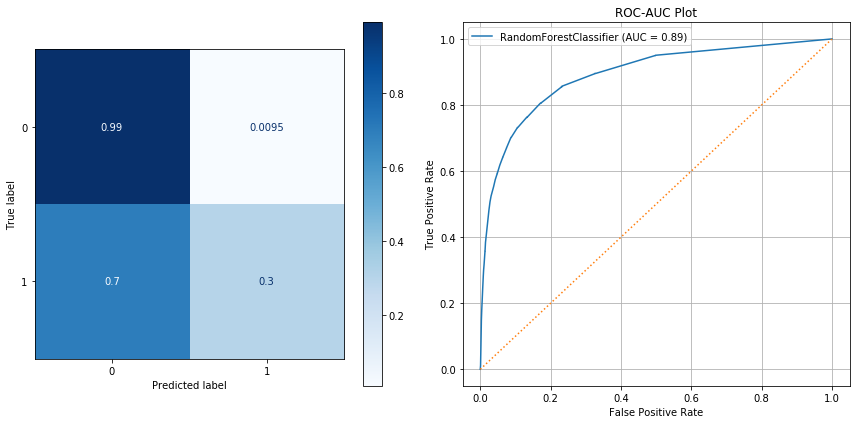

In [47]:
# Fit the model with best parameters
best_rf_params = grid.best_params_
best_rf_model = RandomForestClassifier(**best_rf_params,
                                       random_state = 30)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(best_rf_model, X_test_df, y_test)

### XGBoost

In [48]:
from xgboost import XGBClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.82      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.82      0.59     34878
weighted avg       0.95      0.82      0.87     34878



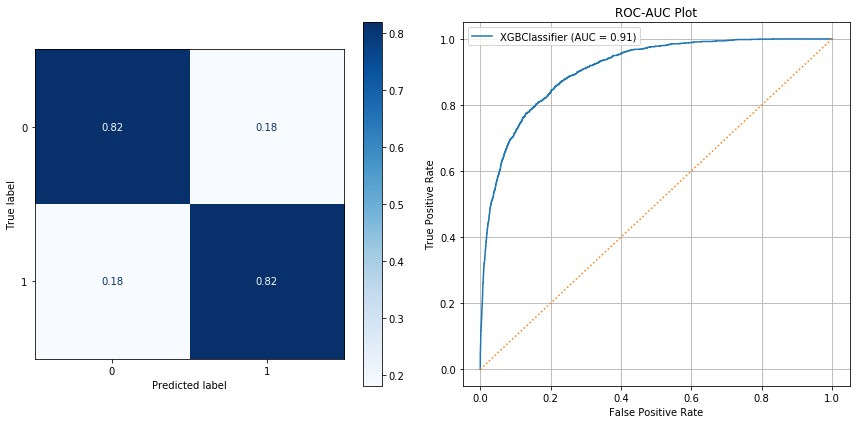

In [49]:
# Set model
xgb = XGBClassifier()

# Fit model
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(xgb, X_test_df, y_test)

### Neural Network

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import Callback, EarlyStopping

#### Super Basic Model

Epoch 1/50
5823/5823 [==============================] - 17s 3ms/step - loss: 0.5101 - accuracy: 0.8219 - val_loss: 0.9952 - val_accuracy: 0.5725
Epoch 2/50
5823/5823 [==============================] - 17s 3ms/step - loss: 0.4165 - accuracy: 0.8251 - val_loss: 0.8493 - val_accuracy: 0.6075
Epoch 3/50
5823/5823 [==============================] - 19s 3ms/step - loss: 0.4113 - accuracy: 0.8272 - val_loss: 0.7752 - val_accuracy: 0.6951
Epoch 4/50
5823/5823 [==============================] - 20s 4ms/step - loss: 0.4104 - accuracy: 0.8275 - val_loss: 0.8948 - val_accuracy: 0.6306
Epoch 5/50
5823/5823 [==============================] - 18s 3ms/step - loss: 0.4092 - accuracy: 0.8274 - val_loss: 0.5019 - val_accuracy: 0.7919
Epoch 6/50
5823/5823 [==============================] - 18s 3ms/step - loss: 0.4082 - accuracy: 0.8281 - val_loss: 0.8204 - val_accuracy: 0.6619
Epoch 7/50
5823/5823 [==============================] - 18s 3ms/step - loss: 0.4073 - accuracy: 0.8287 - val_loss: 0.5339 - val_ac

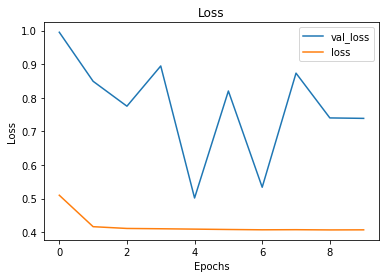

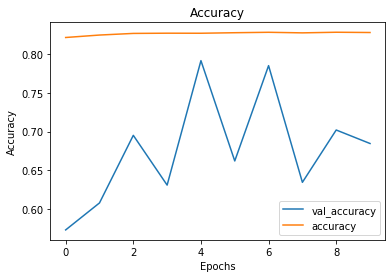

 
                 Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     33323
           1       0.18      0.81      0.29      1555

    accuracy                           0.83     34878
   macro avg       0.58      0.82      0.60     34878
weighted avg       0.95      0.83      0.87     34878

 
                 Confusion Matrix
-------------------------------------------------------


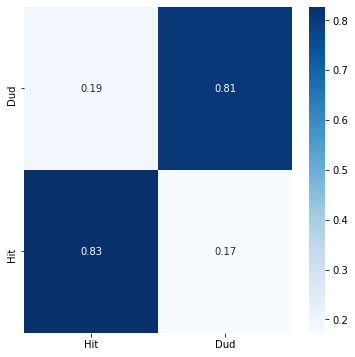

In [61]:
# Set Callback
callback = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max',
                         min_delta = 0.01, restore_best_weights = True)

# Set model
model = Sequential()

# Input layer
model.add(Dense(256, input_dim = X_train_df.shape[1], activation = 'tanh',
                kernel_regularizer = tf.keras.regularizers.L2(0.3)))

# Hidden Layers
model.add(Dense(128, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(8, activation = 'tanh'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile
model.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = 'accuracy')

# Fit the model
history = model.fit(X_train_resampled, y_train_resampled, batch_size = 32, epochs = 50, 
                    validation_split = 0.3, callbacks = callback)

# Evaluate Model
evaluate_network(history, model, X_test_df, y_test)

## Interpret

For the moment, we'll use the XGBoost model to pull our feature importances and run SHAP for our results.

### Feature Importances

In [63]:
# Pull feature importances
features_dict = {'Features': X_train_df.columns,
                 'Importance': xgb.feature_importances_}

# Convert to a dataframe
feature_importance = pd.DataFrame(features_dict, columns = ['Features', 'Importance'])

print(feature_importance.shape)
feature_importance.head(10)

(25, 2)


,Features,Importance
0,acousticness,0.069879
1,danceability,0.013066
2,duration_ms,0.024201
3,energy,0.016111
4,explicit,0.060513
5,instrumentalness,0.076443
6,key,0.003159
7,liveness,0.013889
8,loudness,0.104636
9,mode,0.000000


In [65]:
# Let's remove all features with a 0 importance

for i in feature_importance['Importance']:
    if i == 0:
        feature_importance['Importance'].replace(i, np.nan, inplace = True)
        
feature_importance.dropna(inplace = True)

In [67]:
# Now let's sort and see what we have
feature_importance.sort_values(by = ['Importance'], ascending = False, inplace = True)

print(feature_importance.shape)
feature_importance

(24, 2)


,Features,Importance
23,year_2010s,0.253518
8,loudness,0.104636
5,instrumentalness,0.076443
24,year_2020s,0.072471
0,acousticness,0.069879
4,explicit,0.060513
13,month,0.050301
22,year_2000s,0.048987
17,year_1950s,0.039328
21,year_1990s,0.036073


> Looks as though there's 24 feaures that have some sort of an importance.  Let's plot the top 10.

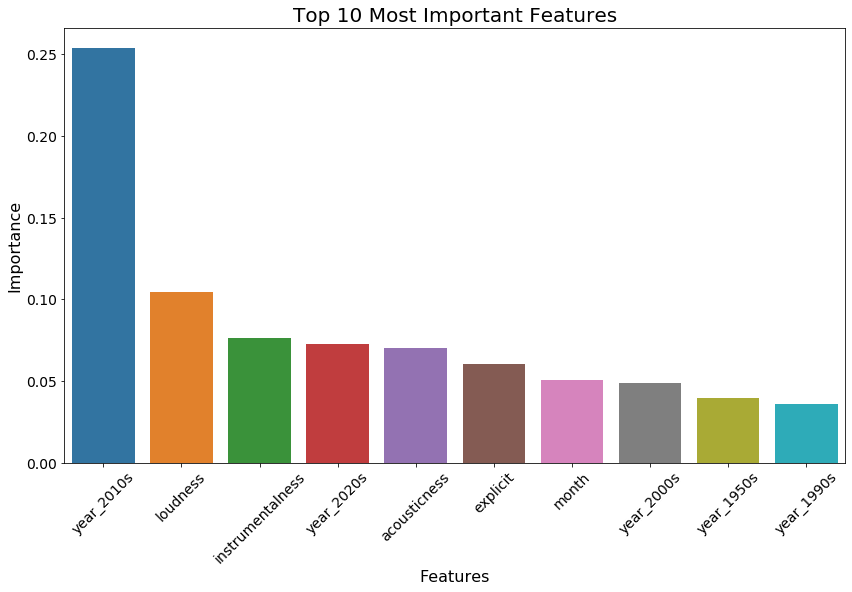

In [70]:
# Create a barpolot of feature importances

ax = plt.figure(figsize = (14, 8))
ax = sns.barplot(data = feature_importance.head(10),
                 x = 'Features', y = 'Importance')
ax.set_title('Top 10 Most Important Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Importance', fontsize = 16)
ax.tick_params(labelsize = 14)
plt.xticks(rotation = 45);

### SHAP

In [71]:
import shap

In [75]:
# Setting up SHAP

X_shap = shap.sample(X_train_df, 100)
explainer = shap.TreeExplainer(xgb, X_train_df)
shap_values = explainer.shap_values(X_shap)

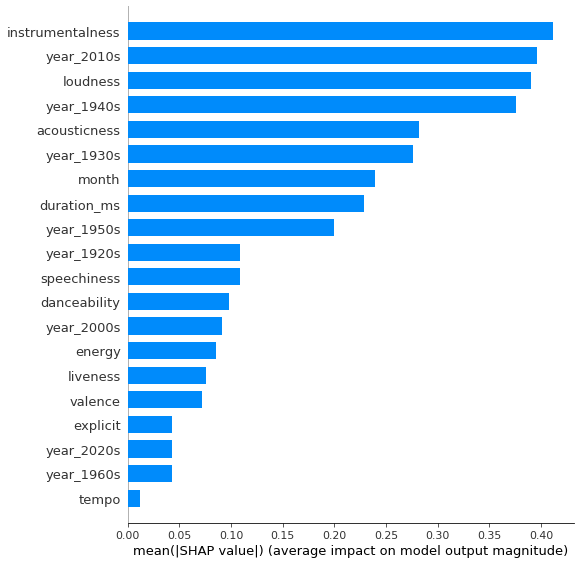

In [76]:
fig = shap.summary_plot(shap_values, X_shap, plot_type = 'bar')

> The top 5 non-year related important features are instrumentalness, loudness, acousticness, duration_ms, and speechiness.

Let's see whether these important features positively or negatively affect the popularity of a song.

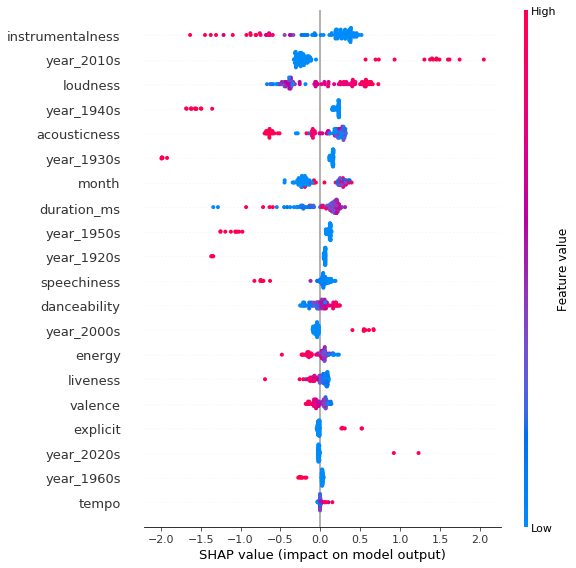

In [77]:
shap.summary_plot(shap_values, X_shap)

## Conclusion

### Results

Since we can't exactly tell someone that to write a hit song, you need to make it be the year 2010, we're going to focus our results on the elements that we can control.  These elements are Spotify's metrics for various aspects of the songs.  For a quick refresher on what each feature means, here's the documentationf from Spotify:

<b><u>Acousticness - </u></b>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br><br>
<b><u>Danceability - </u></b>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br><br>
<b><u>Duration_ms - </u></b>The duration of the track in milliseconds.<br><br>
<b><u>Energy - </u></b>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.<br><br>
<b><u>Explicit - </u></b>Whether a track has explicit language or not. <br><br>
<b><u>Instrumentalness - </u></b>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br><br>
<b><u>Key - </u></b>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.<br><br>
<b><u>Liveness - </u></b>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br><br>
<b><u>Loudness - </u></b>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.<br><br>
<b><u>Mode - </u></b>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br><br>
<b><u>Popularity - </u></b>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Note: When applying track relinking via the market parameter, it is expected to find relinked tracks with popularities that do not match min_*, max_*and target_* popularities. These relinked tracks are accurate replacements for unplayable tracks with the expected popularity scores. <br><br>
<b><u>Speechiness - </u></b>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br><br>
<b><u>Tempo - </u></b>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br><br>
<b><u>Valence - </u></b>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<b>The analysis of this dataset yielded the following results:</b>
-  Higher levels of instrumentalness negatively affect the popularity of a song.
-  The louder the song, the more positively it affects the popularity.
-  The high the level of acousticness, the less popular a song is. 
-  Tracks with spoken words tend to not be popular.
-  Song duration has an inconclusive effect on the popularity of a song, surprisingly.

### Recommendations

<b>Based on these results, we can make the following recommendations to songwriters looking to create a song that has the potential to be popular on Spotify:</b>
- Produce your song using as few acoustic or live instruments as possible.
- Write vocals for every part and try to limit instrumental sections.
- Avoid using spoken word element in your song.
- Make sure to professionally master your track to high dB level as louder tracks are more popular.

### Future Work

<b>With more time, we will complete the following "next steps":</b>
- Rework the project to use a multiclass popularity target that would account for hit songs, solid singles, and duds.
- Spend more time tuning the models to achieve a higher level of accuracy. 
- Figure out a way to include the artist column in the dataset as the popularity of an artist will obviously affect the popularity of a song.
- Expand on the conecpt to be able to deploy a model that can predict whether a new song will be a hit or not.

<center><b><i> Thank you! </i></b></center>